In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import cv2
import os

In [34]:
from tensorflow.keras.datasets import mnist


In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [36]:
print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


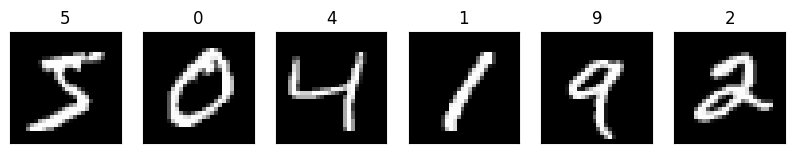

In [37]:
fig = plt.figure(figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

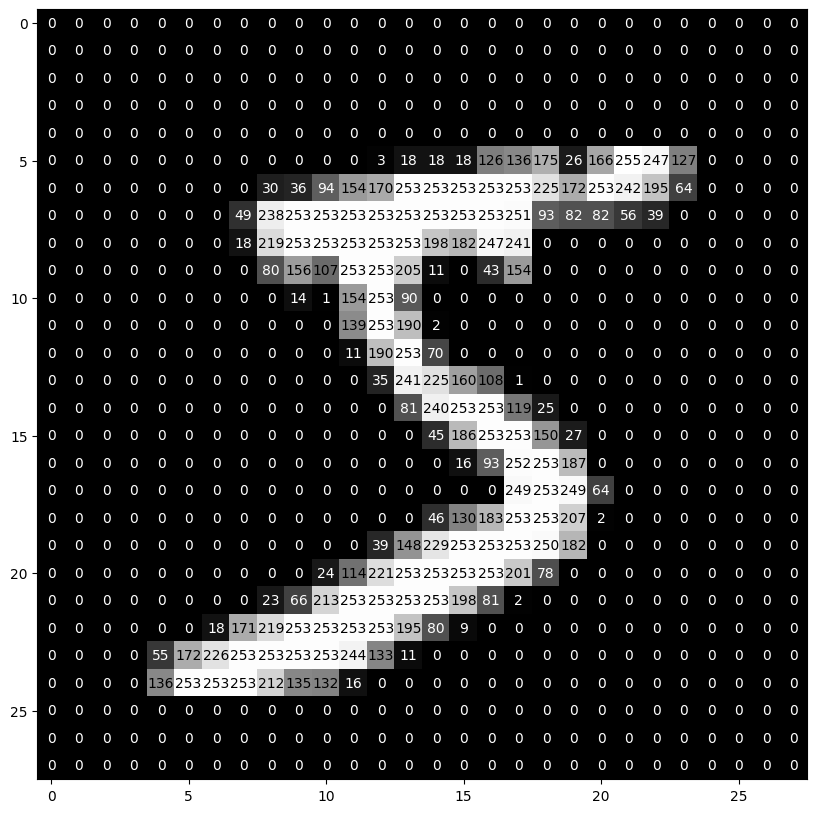

In [38]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [39]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [40]:
from keras.utils import np_utils

In [41]:
num_classes = 10
print('Integer-valued labels:')
print(y_train[:10])


Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]


In [42]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print('One-hot labels:')
print(y_train[:10])

One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [43]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D


In [45]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [48]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1,
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer],
          verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.04455, saving model to model.weights.best.hdf5
938/938 - 83s - loss: 0.1652 - accuracy: 0.9485 - val_loss: 0.0445 - val_accuracy: 0.9852 - 83s/epoch - 88ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.04455 to 0.03110, saving model to model.weights.best.hdf5
938/938 - 82s - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.0311 - val_accuracy: 0.9896 - 82s/epoch - 87ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.03110 to 0.02983, saving model to model.weights.best.hdf5
938/938 - 78s - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0298 - val_accuracy: 0.9895 - 78s/epoch - 83ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.02983 to 0.02891, saving model to model.weights.best.hdf5
938/938 - 81s - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0289 - val_accuracy: 0.9914 - 81s/epoch - 87ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.02891 to 0.02709, saving model to model.weights.best.hdf5
938/938 - 79s - loss: 0.0188

In [49]:
model.load_weights('model.weights.best.hdf5')

In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

In [51]:
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.2800%
